In [32]:
import pandas as pd
from datetime import datetime

# Define the column names as provided
column_names = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']

# Load the data with proper column names
df = pd.read_csv('data/data.txt', sep=' ', header=None, names=column_names)

# Function to parse the time with fallback for different formats
def parse_time(time_str):
    try:
        return datetime.strptime(time_str, '%H:%M:%S.%f').time()
    except ValueError:
        try:
            return datetime.strptime(time_str, '%H:%M:%S').time()
        except ValueError:
            return None

# Apply the function to the 'time' column
df['time'] = df['time'].apply(parse_time)

# Ensure the 'date' column is parsed correctly
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce').dt.date

# Ensure correct data types for other columns
df['epoch'] = pd.to_numeric(df['epoch'], errors='coerce').astype('Int64')
df['moteid'] = pd.to_numeric(df['moteid'], errors='coerce').astype('Int64')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')
df['light'] = pd.to_numeric(df['light'], errors='coerce')
df['voltage'] = pd.to_numeric(df['voltage'], errors='coerce')

# Print the last few rows of the dataframe to verify
print(df.head())

# Optionally, handle any rows where the date or time could not be parsed
invalid_dates = df[df['date'].isna()]
invalid_times = df[df['time'].isna()]

print("Rows with invalid dates:")
print(invalid_dates)

print("Rows with invalid times:")
print(invalid_times)


         date             time  epoch  moteid  temperature  humidity  light  \
0  2004-03-31  03:38:15.757551      2       1     122.1530  -3.91901  11.04   
1  2004-02-28  00:59:16.027850      3       1      19.9884  37.09330  45.08   
2  2004-02-28  01:03:16.333930     11       1      19.3024  38.46290  45.08   
3  2004-02-28  01:06:16.013453     17       1      19.1652  38.80390  45.08   
4  2004-02-28  01:06:46.778088     18       1      19.1750  38.83790  45.08   

   voltage  
0  2.03397  
1  2.69964  
2  2.68742  
3  2.68742  
4  2.69964  
Rows with invalid dates:
Empty DataFrame
Columns: [date, time, epoch, moteid, temperature, humidity, light, voltage]
Index: []
Rows with invalid times:
Empty DataFrame
Columns: [date, time, epoch, moteid, temperature, humidity, light, voltage]
Index: []


In [33]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# Parse the 'time' column dynamically
df['time'] = pd.to_datetime(df['time'], errors='coerce', format='%H:%M:%S.%f').dt.time
df['time'] = df['time'].fillna(pd.to_datetime(df['time'], errors='coerce', format='%H:%M:%S').dt.time)

In [34]:
# Remove rows where 'time' could not be parsed (NaT values)
df = df.dropna(subset=['time'])

In [35]:
# Combine 'date' and 'time' into a single 'datetime' column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

In [36]:
print(df.head())

        date             time  epoch  moteid  temperature  humidity  light  \
0 2004-03-31  03:38:15.757551      2       1     122.1530  -3.91901  11.04   
1 2004-02-28  00:59:16.027850      3       1      19.9884  37.09330  45.08   
2 2004-02-28  01:03:16.333930     11       1      19.3024  38.46290  45.08   
3 2004-02-28  01:06:16.013453     17       1      19.1652  38.80390  45.08   
4 2004-02-28  01:06:46.778088     18       1      19.1750  38.83790  45.08   

   voltage                   datetime  
0  2.03397 2004-03-31 03:38:15.757551  
1  2.69964 2004-02-28 00:59:16.027850  
2  2.68742 2004-02-28 01:03:16.333930  
3  2.68742 2004-02-28 01:06:16.013453  
4  2.69964 2004-02-28 01:06:46.778088  


In [37]:
df = df[df['temperature'] <= 40]

In [39]:
import pandas as pd

# Assuming df is your existing DataFrame with a 'datetime' column and 'moteid' numbered from 1 to 54

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Identify mote IDs that have no values
motes_with_values = df.groupby('moteid')['temperature'].count()
motes_to_keep = motes_with_values[motes_with_values > 0].index.tolist()

# Filter the DataFrame to keep only the mote IDs with values
filtered_df = df[df['moteid'].isin(motes_to_keep)]

# Re-number the mote IDs from 1 to N
moteid_mapping = {old_id: new_id for new_id, old_id in enumerate(motes_to_keep, start=1)}
filtered_df['moteid'] = filtered_df['moteid'].map(moteid_mapping)

# Reset index to ensure the DataFrame is clean
filtered_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(filtered_df.head())

# Save the DataFrame to a CSV file if needed
# filtered_df.to_csv('filtered_renumbered_df.csv', index=False)


        date             time  epoch  moteid  temperature  humidity  light  \
0 2004-02-28  00:59:16.027850      3       1      19.9884   37.0933  45.08   
1 2004-02-28  01:03:16.333930     11       1      19.3024   38.4629  45.08   
2 2004-02-28  01:06:16.013453     17       1      19.1652   38.8039  45.08   
3 2004-02-28  01:06:46.778088     18       1      19.1750   38.8379  45.08   
4 2004-02-28  01:08:45.992524     22       1      19.1456   38.9401  45.08   

   voltage                   datetime  
0  2.69964 2004-02-28 00:59:16.027850  
1  2.68742 2004-02-28 01:03:16.333930  
2  2.68742 2004-02-28 01:06:16.013453  
3  2.69964 2004-02-28 01:06:46.778088  
4  2.68742 2004-02-28 01:08:45.992524  


In [20]:
df['moteid'].tail()

2313149       58
2313150       58
2313151       58
2313152       58
2313154    33117
Name: moteid, dtype: Int64

In [40]:
import pandas as pd

# Assuming df is your existing DataFrame with a 'datetime' column and 'moteid'

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Remove duplicate rows if any
df = df.drop_duplicates()

# Check for mote IDs outside the expected range (1 to 54)
unexpected_moteids = df[~df['moteid'].isin(range(1, 55))]
if not unexpected_moteids.empty:
    print("Rows with unexpected mote IDs:")
    print(unexpected_moteids)

# Filter the DataFrame to keep only the mote IDs within the expected range
df = df[df['moteid'].isin(range(1, 55))]

# Identify mote IDs that have no values
motes_with_values = df.groupby('moteid')['temperature'].count()
motes_to_keep = motes_with_values[motes_with_values > 0].index.tolist()

# Filter the DataFrame to keep only the mote IDs with values
filtered_df = df[df['moteid'].isin(motes_to_keep)]

# Re-number the mote IDs from 1 to N
moteid_mapping = {old_id: new_id for new_id, old_id in enumerate(motes_to_keep, start=1)}
filtered_df['moteid'] = filtered_df['moteid'].map(moteid_mapping)

# Reset index to ensure the DataFrame is clean
filtered_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(filtered_df.head())

# Get a count of unique moteid
unique_moteid_count = filtered_df['moteid'].nunique()
print(f'Unique moteid count: {unique_moteid_count}')


Rows with unexpected mote IDs:
              date             time  epoch  moteid  temperature  humidity  \
2303290 2004-03-11  16:52:19.794238      2      55      26.2114   43.4524   
2303291 2004-03-12  09:15:21.526642      2      55      22.0170   41.7805   
2303292 2004-03-11  17:19:23.925033      2      55      25.4274   33.3507   
2303293 2004-03-11  17:15:52.136107      2      55      25.0158   33.9790   
2303294 2004-03-11  16:53:15.807424      4      55      26.2800   35.2995   
...            ...              ...    ...     ...          ...       ...   
2313149 2004-04-02  09:07:22.173243  62423      58      24.1436   21.7310   
2313150 2004-04-02  09:07:52.313870  62424      58      24.1436   21.6575   
2313151 2004-04-02  09:08:52.189274  62426      58      24.1240   21.5839   
2313152 2004-04-02  09:09:22.206544  62427      58      24.1044   21.4367   
2313154 2004-03-09  15:04:42.202647  30493   33117     -36.2048       NaN   

           light   voltage                  

In [23]:
import pandas as pd

# Assuming df is your existing DataFrame with a 'datetime' column and 'moteid'

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Remove duplicate rows if any
df = df.drop_duplicates()

# Check for mote IDs outside the expected range (1 to 54)
unexpected_moteids = df[~df['moteid'].isin(range(1, 55))]
if not unexpected_moteids.empty:
    print("Rows with unexpected mote IDs:")
    print(unexpected_moteids)
    # Optionally, drop these rows
    df = df[df['moteid'].isin(range(1, 55))]

# Identify mote IDs that have no values
motes_with_values = df.groupby('moteid')['temperature'].count()
motes_to_keep = motes_with_values[motes_with_values > 0].index.tolist()

# Filter the DataFrame to keep only the mote IDs with values
filtered_df = df[df['moteid'].isin(motes_to_keep)]

# Re-number the mote IDs from 1 to N
moteid_mapping = {old_id: new_id for new_id, old_id in enumerate(motes_to_keep, start=1)}
filtered_df['moteid'] = filtered_df['moteid'].map(moteid_mapping)

# Reset index to ensure the DataFrame is clean
filtered_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(filtered_df.tail())

# Get a count of unique moteid
unique_moteid_count = filtered_df['moteid'].nunique()
print(f'Unique moteid count: {unique_moteid_count}')


              date             time  epoch  moteid  temperature  humidity  \
1887403 2004-03-21  18:53:27.558979  65510      53      21.4780   47.6361   
1887404 2004-03-21  18:54:43.117051  65512      53      21.4780   47.6361   
1887405 2004-03-21  18:57:30.336879  65518      53      21.4192   47.6687   
1887406 2004-03-21  18:59:36.673512  65522      53      21.3996   47.7013   
1887407 2004-03-21  19:02:56.249587  65529      53      21.3604   47.8315   

         light  voltage                   datetime  
1887403   0.46  2.35683 2004-03-21 18:53:27.558979  
1887404   0.46  2.34751 2004-03-21 18:54:43.117051  
1887405   0.46  2.34751 2004-03-21 18:57:30.336879  
1887406   0.46  2.34751 2004-03-21 18:59:36.673512  
1887407   0.46  2.34751 2004-03-21 19:02:56.249587  
Unique moteid count: 53


In [31]:
filtered_df[filtered_df['moteid']==53]

,date,time,epoch,moteid,temperature,humidity,light,voltage,datetime
1858729,2004-02-28,01:05:16.488605,15,53,15.9900,45.8024,41.40,2.65143,2004-02-28 01:05:16.488605
1858730,2004-02-28,01:05:45.981877,16,53,15.9704,45.8682,41.40,2.65143,2004-02-28 01:05:45.981877
1858731,2004-02-28,01:06:46.266551,18,53,15.9312,46.0326,41.40,2.65143,2004-02-28 01:06:46.266551
1858732,2004-02-28,01:07:16.209003,19,53,15.9312,46.0655,41.40,2.65143,2004-02-28 01:07:16.209003
1858733,2004-02-28,01:07:46.206186,20,53,15.9116,46.0655,41.40,2.65143,2004-02-28 01:07:46.206186
...,...,...,...,...,...,...,...,...,...
1887403,2004-03-21,18:53:27.558979,65510,53,21.4780,47.6361,0.46,2.35683,2004-03-21 18:53:27.558979
1887404,2004-03-21,18:54:43.117051,65512,53,21.4780,47.6361,0.46,2.34751,2004-03-21 18:54:43.117051
1887405,2004-03-21,18:57:30.336879,65518,53,21.4192,47.6687,0.46,2.34751,2004-03-21 18:57:30.336879
1887406,2004-03-21,18:59:36.673512,65522,53,21.3996,47.7013,0.46,2.34751,2004-03-21 18:59:36.673512


In [11]:
import pandas as pd

df['datetime'] = pd.to_datetime(df['datetime'])

# Ensure the DataFrame includes only moteids 1, 2, 3, and 4
moteids = [1, 2, 3, 4]

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Iterate over each specified moteid and get the first 5000 temperature values
for moteid in moteids:
    mote_df = df[df['moteid'] == moteid].head(5000)
    temp_df = mote_df[['temperature']].reset_index(drop=True)
    temp_df.columns = [f'mote{moteid}']
    if result_df.empty:
        result_df = temp_df
    else:
        result_df = pd.concat([result_df, temp_df], axis=1)

# Add the serial number (SN) column
result_df.insert(0, 'SN', range(1, len(result_df) + 1))

# Display the resulting DataFrame
print(result_df.head())

# Save the DataFrame to a CSV file
result_df.to_csv('top_four_motes_temperatures.csv', index=False)


   SN    mote1    mote2    mote3    mote4
0   1  19.9884  19.5670  20.2040  23.0558
1   2  19.3024  19.5376  19.4396  23.0362
2   3  19.1652  19.4788  19.4102  22.9872
3   4  19.1750  19.4494  19.4102  19.8806
4   5  19.1456  19.4984  19.4004  19.8512


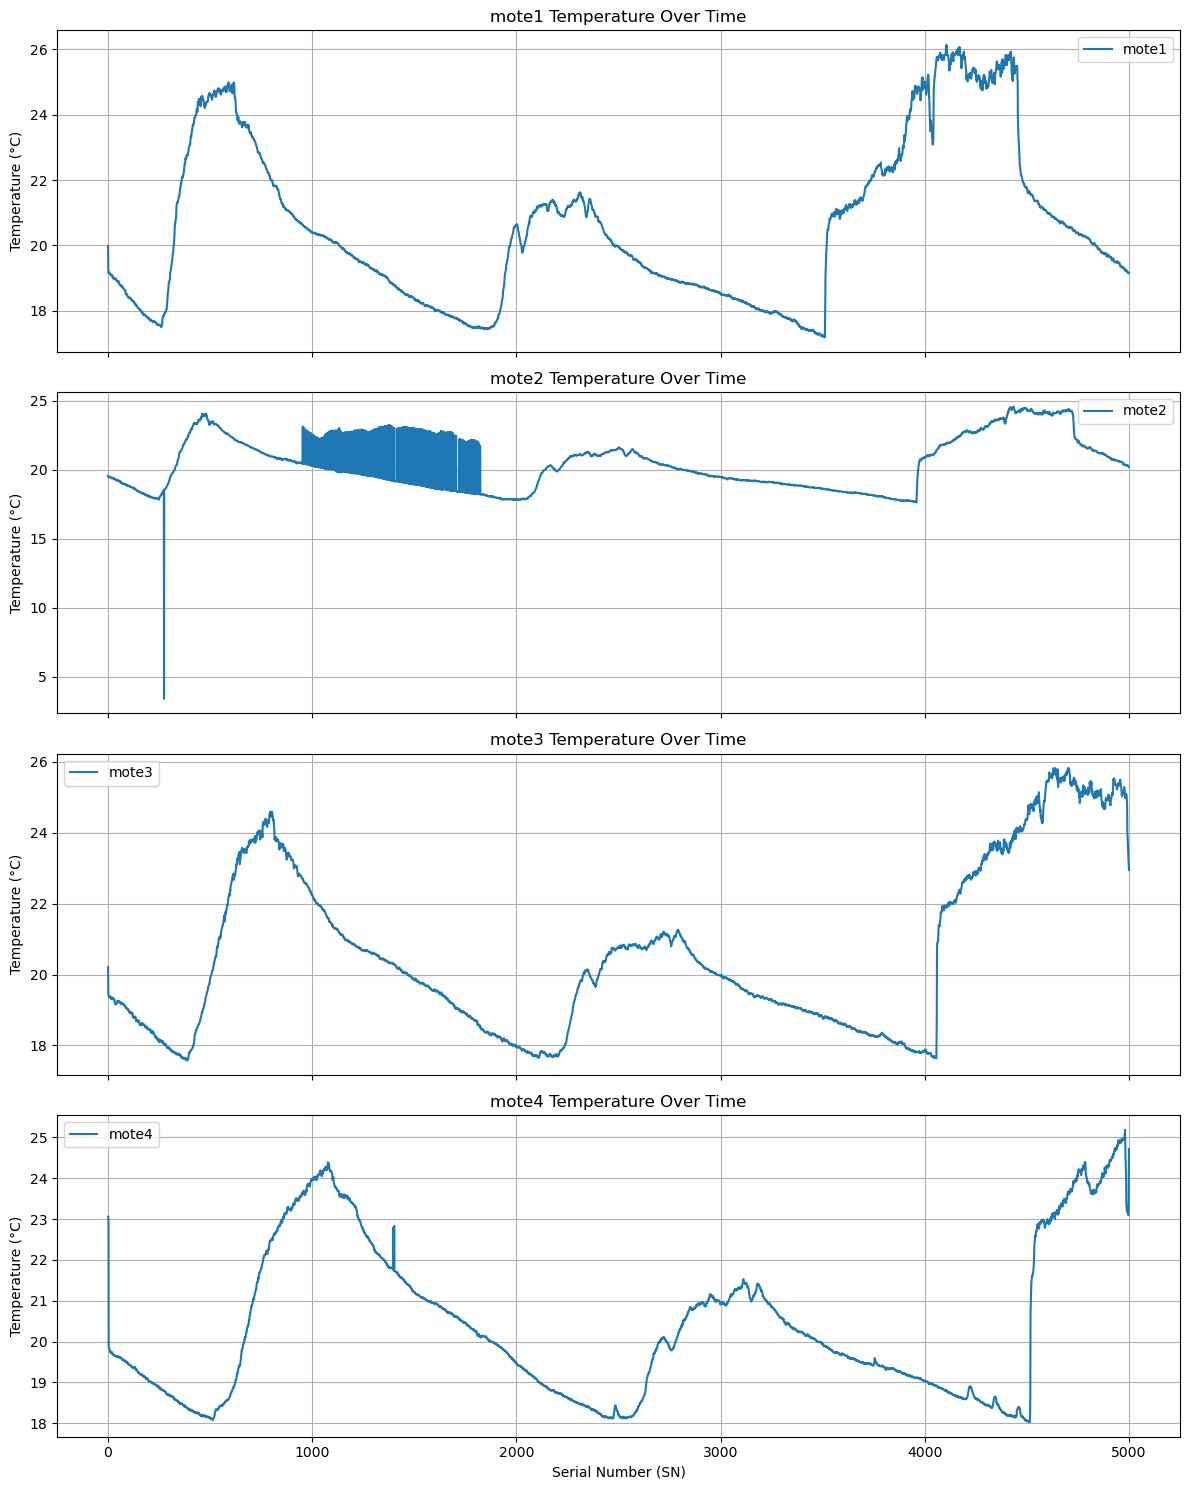

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Save the DataFrame to a CSV file
result_df.to_csv('top_four_motes_temperatures.csv', index=False)

# Plotting the temperature values for each mote in separate subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 15), sharex=True)

for i, mote in enumerate(['mote1', 'mote2', 'mote3', 'mote4']):
    axs[i].plot(result_df['SN'], result_df[mote], label=mote)
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].set_title(f'{mote} Temperature Over Time')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Serial Number (SN)')
plt.tight_layout()
plt.show()


In [13]:
df[df['moteid']==4].tail(10)


,date,time,epoch,moteid,temperature,humidity,light,voltage,datetime
179724,2004-03-21,05:30:54.667741,63905,4,39.5100,44.5482,5.52,2.32,2004-03-21 05:30:54.667741
179725,2004-03-21,05:32:28.030218,63908,4,39.5100,44.6475,5.52,2.32,2004-03-21 05:32:28.030218
179726,2004-03-21,05:33:54.151272,63911,4,39.7746,44.4488,5.52,2.32,2004-03-21 05:33:54.151272
179727,2004-03-21,05:34:54.582819,63913,4,39.5590,44.3162,5.52,2.32,2004-03-21 05:34:54.582819
179728,2004-03-21,05:35:29.307712,63914,4,39.6668,44.3162,5.52,2.32,2004-03-21 05:35:29.307712
179729,2004-03-21,05:36:28.167539,63916,4,39.7942,44.6806,5.52,2.32,2004-03-21 05:36:28.167539
179730,2004-03-21,05:36:58.550419,63917,4,39.9020,44.3825,5.52,2.32,2004-03-21 05:36:58.550419
179731,2004-03-21,05:38:02.189893,63919,4,39.9902,44.6806,5.52,2.32,2004-03-21 05:38:02.189893
179732,2004-03-21,05:39:32.533706,63922,4,39.9118,44.5151,5.52,2.32,2004-03-21 05:39:32.533706
179733,2004-03-21,05:39:55.029407,63923,4,39.9216,44.4157,5.52,2.32,2004-03-21 05:39:55.029407


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the pivot DataFrame
pivot_df = pd.read_csv('top_four_motes_temperatures.csv')
pivot_df  = pivot_df.head(5000)


# Initialize parameters
alpha = 0.4
beta = 0.4
initial_state = 20.0  # Initial temperature estimate
initial_rate = 0.01    # Initial rate of change estimate
theta = 0.05  # Threshold for significant change
num_nodes_to_poll = 2  # Number of nodes to poll at each timestep (adjustable)
max_value = 40  # Maximum value to clamp to prevent overflow


# Energy parameters in Joules
E_max = 162000  # Battery capacity in Joules
E_t = 50 / 1000  # Transmission energy in Joules
E_s = 10 / 1000  # Sensing energy in Joules
E_w = 10 / 1000  # Wake-up energy in Joules
E_0 = 1 / 1000   # Sleep energy in Joules

state_estimates = {f'mote{i}': initial_state for i in range(1, 5)}
rate_of_change = {f'mote{i}': initial_rate for i in range(1, 5)}

# Initialize previous timestamps for delta time calculation
last_sensed_values = {f'mote{i}': initial_state for i in range(1, 5)}
last_update_times = {f'mote{i}': 0 for i in range(1, 5)}

# Initialize a list to store the most valuable sensor data and the associated metadata
valuable_sensor_data = []

# Initialize tracking arrays
polled_count = {f'mote{i}': 0 for i in range(1, 5)}
transmitted_count = {f'mote{i}': 0 for i in range(1, 5)}

# Function to predict node state
def predict_node_state(x_hat, x_rate, delta_t):
    result = x_hat + x_rate * delta_t
    return np.clip(result, -max_value, max_value)  # Clamp the value to prevent overflow

# Function to select sensors based on predicted changes
def select_top_nodes(state_estimates, rate_of_change, last_sensed_values, num_nodes_to_poll, delta_t):
    predicted_values = {mote: predict_node_state(state_estimates[mote], rate_of_change[mote], delta_t) for mote in state_estimates}
    value_changes = {mote: abs(predicted_values[mote] - last_sensed_values[mote]) for mote in state_estimates}
    top_nodes = sorted(value_changes, key=value_changes.get, reverse=True)[:num_nodes_to_poll]
    return top_nodes

# Simulation loop
for idx, row in pivot_df.iterrows():
    current_time_step = idx
    delta_t_global = current_time_step - min(last_update_times.values())

    # Predict the sensor with the most significant changes
    top_sensors = select_top_nodes(state_estimates, rate_of_change, last_sensed_values, num_nodes_to_poll, delta_t_global)

    for mote in top_sensors:
        polled_count[mote] += 1
        measured_value = row[mote]
        previous_state = state_estimates[mote]
        previous_rate = rate_of_change[mote]
        delta_t = max(current_time_step - last_update_times[mote], 1)  # Default to 1 if first measurement

        # Update state estimate using the provided formulas
        state_estimates[mote] = alpha * measured_value + (1 - alpha) * (previous_state + previous_rate * delta_t)
        state_estimates[mote] = np.clip(state_estimates[mote], -max_value, max_value)  # Clamp the value to prevent overflow

        if delta_t != 0:
            rate_of_change[mote] = beta * (state_estimates[mote] - previous_state) / delta_t + (1 - beta) * previous_rate
            rate_of_change[mote] = np.clip(rate_of_change[mote], -max_value, max_value)  # Clamp the value to prevent overflow

        predicted_measurement = predict_node_state(state_estimates[mote], rate_of_change[mote], delta_t)
        
        if abs(measured_value - predicted_measurement) > theta:
            transmitted_count[mote] += 1

            last_sensed_values[mote] = measured_value
        
        # Store the data
            valuable_sensor_data.append({
                'index': current_time_step,
                'selected_moteid': mote,
                'temperature': measured_value,
                'predicted_temperature': predicted_measurement,
                'time_elapsed': delta_t
            })

    # Update the last selected index for the most valuable mote
    for mote in top_sensors:
        last_update_times[mote] = current_time_step

# Convert the list to a DataFrame
valuable_sensor_df = pd.DataFrame(valuable_sensor_data)

# Calculate the average MSE
valuable_sensor_df['squared_error'] = (valuable_sensor_df['temperature'] - valuable_sensor_df['predicted_temperature']) ** 2
average_mse = valuable_sensor_df['squared_error'].mean()
print(f'Average MSE: {average_mse}')


# Calculate polling and transmission fractions
time_steps = len(pivot_df)
fw = {mote: polled_count[mote] / time_steps for mote in polled_count}
ft = {mote: transmitted_count[mote] / time_steps for mote in transmitted_count}

# Calculate the average lifetime of sensors in hours and years
average_lifetime_hours = np.mean([
    E_max / (ft[mote] * E_t + fw[mote] * (E_s + 3 * E_w) + (1 - fw[mote]) * E_0) for mote in polled_count
]) / 3600

average_lifetime_years = average_lifetime_hours / 8760  # Convert hours to years
print("Average sensor lifetime (years):", average_lifetime_years)

# Save the DataFrame to a CSV file
valuable_sensor_df.to_csv('valuable_sensor_df.csv', index=False)


Average MSE: 0.4203438094786939
Average sensor lifetime (years): 0.25050531286812155


In [15]:
# Print the number of times each sensor was polled and transmitted
for mote in polled_count:
    print(f'{mote} was polled {polled_count[mote]} times and transmitted {transmitted_count[mote]} times')


mote1 was polled 3601 times and transmitted 376 times
mote2 was polled 2156 times and transmitted 501 times
mote3 was polled 1096 times and transmitted 236 times
mote4 was polled 3147 times and transmitted 160 times


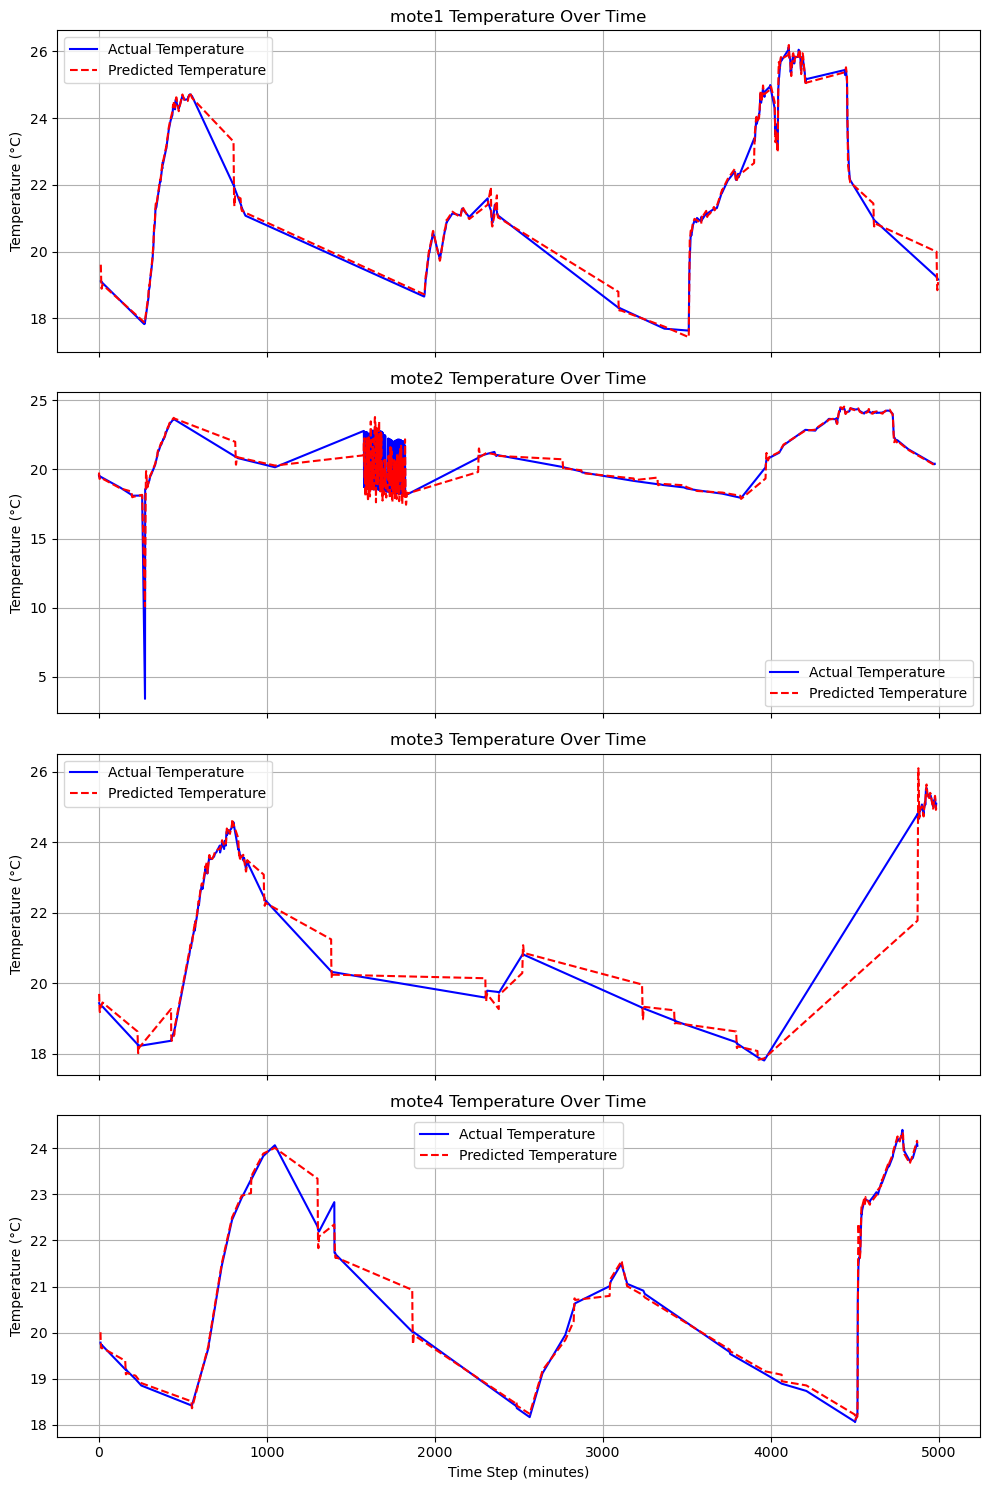

In [16]:
# Plot the actual and predicted temperatures for each mote
fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
for i, mote in enumerate(['mote1', 'mote2', 'mote3', 'mote4']):
    mote_data = valuable_sensor_df[valuable_sensor_df['selected_moteid'] == mote]
    axs[i].plot(mote_data['index'], mote_data['temperature'], 'b-', label='Actual Temperature')
    axs[i].plot(mote_data['index'], mote_data['predicted_temperature'], 'r--', label='Predicted Temperature')
    axs[i].set_title(f'{mote} Temperature Over Time')
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Time Step (minutes)')
plt.tight_layout()
plt.show()

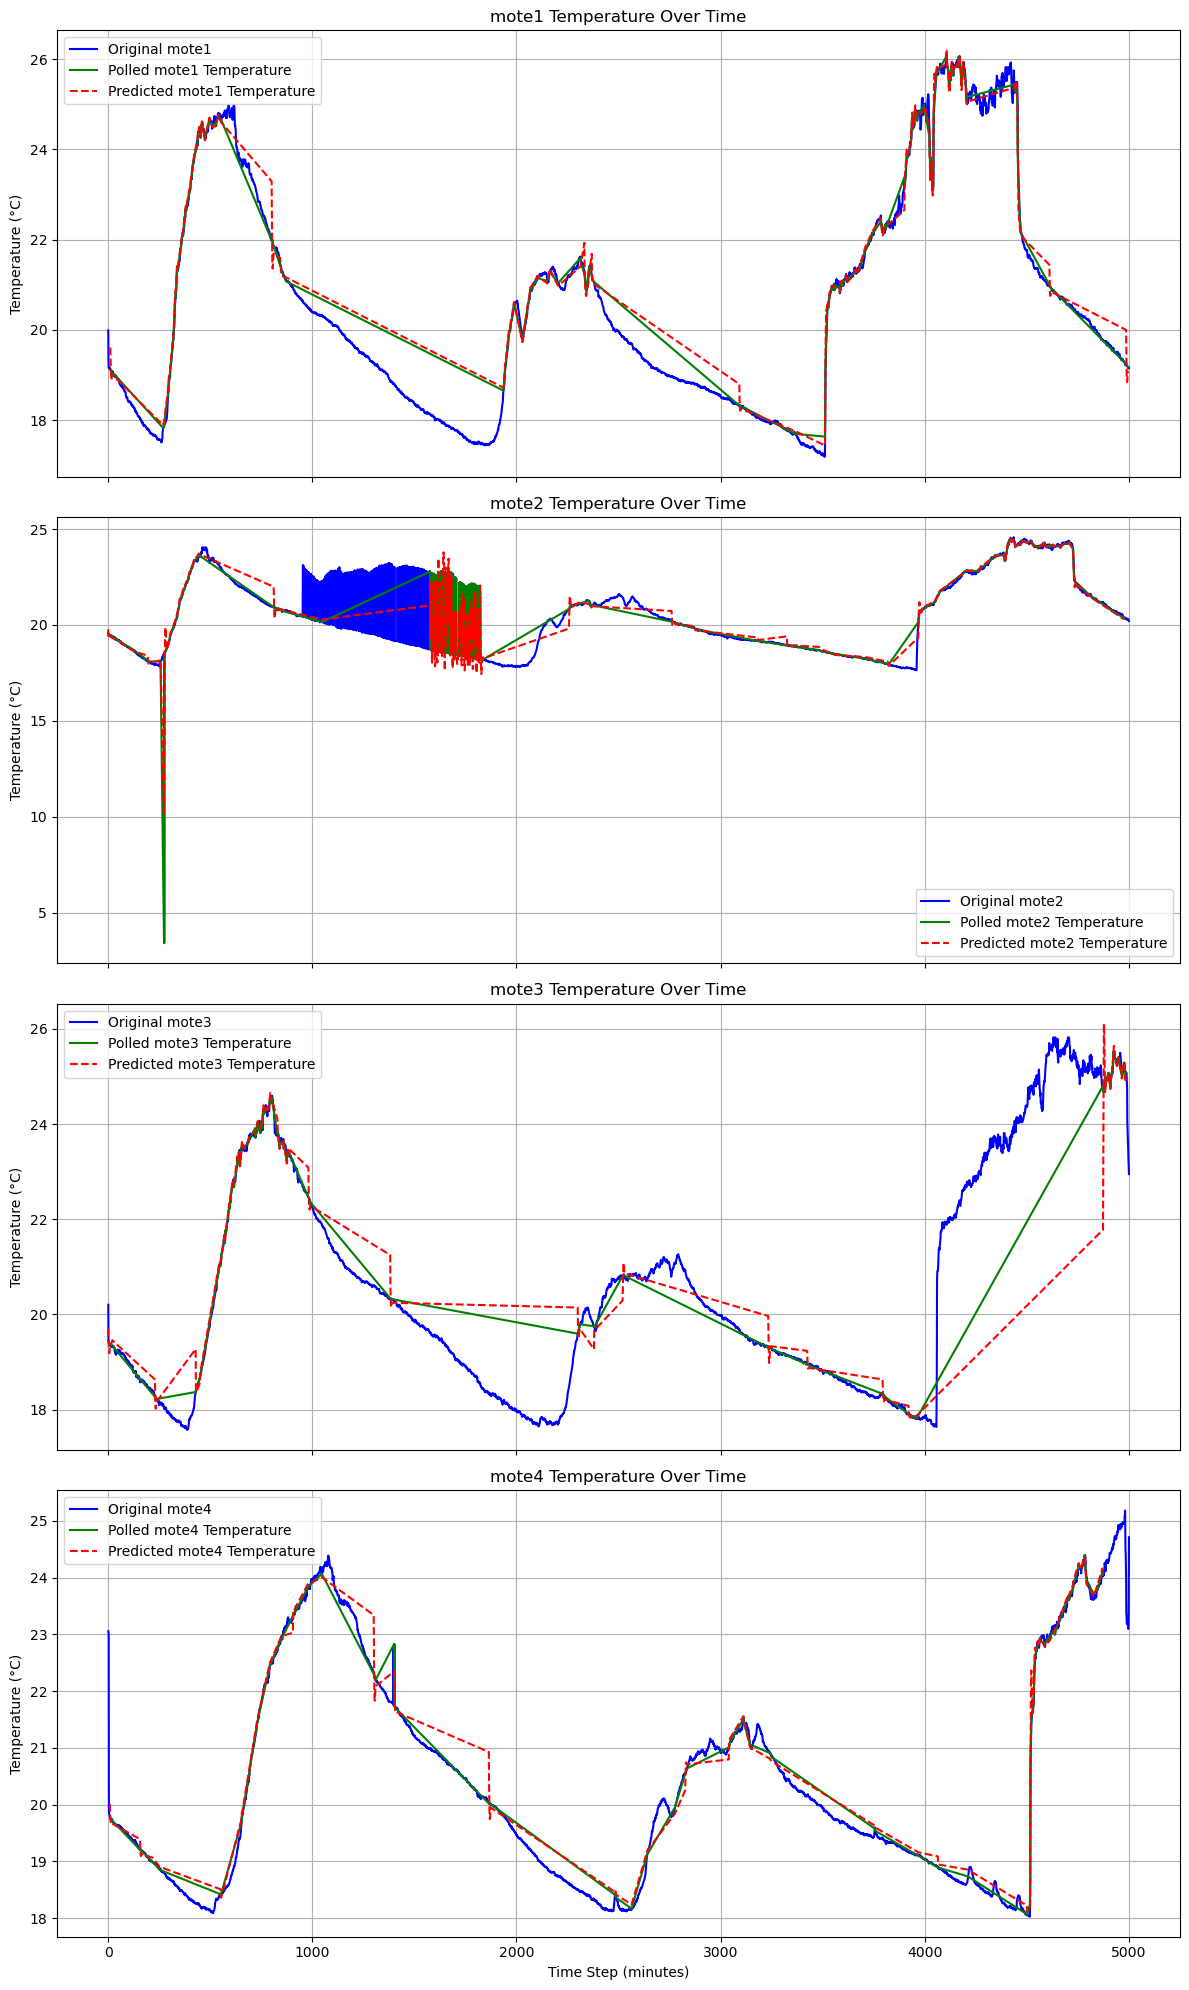

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming result_df contains the original data
# Assuming valuable_sensor_df contains the data from the sink end

# Plotting the temperature values for each mote in separate subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 20), sharex=True)

for i, mote in enumerate(['mote1', 'mote2', 'mote3', 'mote4']):
    # Plot original data from the node end
    axs[i].plot(result_df['SN'], result_df[mote], 'b-', label=f'Original {mote}')
    
    # Plot data collected from the sink end
    mote_data = valuable_sensor_df[valuable_sensor_df['selected_moteid'] == mote]
    axs[i].plot(mote_data['index'], mote_data['temperature'], 'g-', label=f'Polled {mote} Temperature')
    axs[i].plot(mote_data['index'], mote_data['predicted_temperature'], 'r--', label=f'Predicted {mote} Temperature')
    
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].set_title(f'{mote} Temperature Over Time')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Time Step (minutes)')
plt.tight_layout()
plt.show()


# Extend to 20 nodes 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the pivot DataFrame
pivot_df = pd.read_csv('top_twenty_motes_temperatures.csv')
pivot_df  = pivot_df.head(5000)


# Initialize parameters
alpha = 0.4
beta = 0.4
initial_state = 20.0  # Initial temperature estimate
initial_rate = 0.01    # Initial rate of change estimate
theta = 0.05  # Threshold for significant change
num_nodes_to_poll = 4  # Number of nodes to poll at each timestep (adjustable)
max_value = 40  # Maximum value to clamp to prevent overflow


# Energy parameters in Joules
E_max = 162000  # Battery capacity in Joules
E_t = 50 / 1000  # Transmission energy in Joules
E_s = 10 / 1000  # Sensing energy in Joules
E_w = 10 / 1000  # Wake-up energy in Joules
E_0 = 1 / 1000   # Sleep energy in Joules

state_estimates = {f'mote{i}': initial_state for i in range(1, 21)}
rate_of_change = {f'mote{i}': initial_rate for i in range(1, 21)}

# Initialize previous timestamps for delta time calculation
last_sensed_values = {f'mote{i}': initial_state for i in range(1, 21)}
last_update_times = {f'mote{i}': 0 for i in range(1, 21)}

# Initialize a list to store the most valuable sensor data and the associated metadata
valuable_sensor_data = []

# Initialize tracking arrays
polled_count = {f'mote{i}': 0 for i in range(1, 21)}
transmitted_count = {f'mote{i}': 0 for i in range(1, 21)}

# Function to predict node state
def predict_node_state(x_hat, x_rate, delta_t):
    result = x_hat + x_rate * delta_t
    return np.clip(result, -max_value, max_value)  # Clamp the value to prevent overflow

# Function to select sensors based on predicted changes
def select_top_nodes(state_estimates, rate_of_change, last_sensed_values, num_nodes_to_poll, delta_t):
    predicted_values = {mote: predict_node_state(state_estimates[mote], rate_of_change[mote], delta_t) for mote in state_estimates}
    value_changes = {mote: abs(predicted_values[mote] - last_sensed_values[mote]) for mote in state_estimates}
    top_nodes = sorted(value_changes, key=value_changes.get, reverse=True)[:num_nodes_to_poll]
    return top_nodes

# Simulation loop
for idx, row in pivot_df.iterrows():
    current_time_step = idx
    delta_t_global = current_time_step - min(last_update_times.values())

    # Predict the sensor with the most significant changes
    top_sensors = select_top_nodes(state_estimates, rate_of_change, last_sensed_values, num_nodes_to_poll, delta_t_global)

    for mote in top_sensors:
        polled_count[mote] += 1
        measured_value = row[mote]
        previous_state = state_estimates[mote]
        previous_rate = rate_of_change[mote]
        delta_t = max(current_time_step - last_update_times[mote], 1)  # Default to 1 if first measurement

        # Update state estimate using the provided formulas
        state_estimates[mote] = alpha * measured_value + (1 - alpha) * (previous_state + previous_rate * delta_t)
        state_estimates[mote] = np.clip(state_estimates[mote], -max_value, max_value)  # Clamp the value to prevent overflow

        if delta_t != 0:
            rate_of_change[mote] = beta * (state_estimates[mote] - previous_state) / delta_t + (1 - beta) * previous_rate
            rate_of_change[mote] = np.clip(rate_of_change[mote], -max_value, max_value)  # Clamp the value to prevent overflow

        predicted_measurement = predict_node_state(state_estimates[mote], rate_of_change[mote], delta_t)
        
        if abs(measured_value - predicted_measurement) > theta:
            transmitted_count[mote] += 1

            last_sensed_values[mote] = measured_value
        
        # Store the data
            valuable_sensor_data.append({
                'index': current_time_step,
                'selected_moteid': mote,
                'temperature': measured_value,
                'predicted_temperature': predicted_measurement,
                'time_elapsed': delta_t
            })

    # Update the last selected index for the most valuable mote
    for mote in top_sensors:
        last_update_times[mote] = current_time_step

# Convert the list to a DataFrame
valuable_sensor_df = pd.DataFrame(valuable_sensor_data)

# Calculate the average MSE
valuable_sensor_df['squared_error'] = (valuable_sensor_df['temperature'] - valuable_sensor_df['predicted_temperature']) ** 2
average_mse = valuable_sensor_df['squared_error'].mean()
print(f'Average MSE: {average_mse}')


# Calculate polling and transmission fractions
time_steps = len(pivot_df)
fw = {mote: polled_count[mote] / time_steps for mote in polled_count}
ft = {mote: transmitted_count[mote] / time_steps for mote in transmitted_count}

# Calculate the average lifetime of sensors in hours and years
average_lifetime_hours = np.mean([
    E_max / (ft[mote] * E_t + fw[mote] * (E_s + 3 * E_w) + (1 - fw[mote]) * E_0) for mote in polled_count
]) / 3600

average_lifetime_years = average_lifetime_hours / 8760  # Convert hours to years
print("Average sensor lifetime (years):", average_lifetime_years)

# Save the DataFrame to a CSV file
valuable_sensor_df.to_csv('valuable_sensor_df.csv', index=False)


Average MSE: 0.7748747893289668
Average sensor lifetime (years): 0.7274307246000437


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the pivot DataFrame
pivot_df = pd.read_csv('top_twenty_motes_temperatures.csv')
pivot_df = pivot_df.head(5000)

# Initialize parameters
alpha = 0.2
beta = 0.2
initial_state = 20.0  # Initial temperature estimate
initial_rate = 0.01   # Initial rate of change estimate
theta = 0.05  # Threshold for significant change
num_nodes_to_poll = 10  # Number of nodes to poll at each timestep (adjustable)
max_value = 40  # Maximum value to clamp to prevent overflow

# Force pull threshold
force_pull_threshold = 200  # Forcefully pull a node if it hasn't been pulled in the last 10 time steps

# Energy parameters in Joules
E_max = 162000  # Battery capacity in Joules
E_t = 50 / 1000  # Transmission energy in Joules
E_s = 10 / 1000  # Sensing energy in Joules
E_w = 10 / 1000  # Wake-up energy in Joules
E_0 = 1 / 1000   # Sleep energy in Joules

state_estimates = {f'mote{i}': initial_state for i in range(1, 21)}
rate_of_change = {f'mote{i}': initial_rate for i in range(1, 21)}

# Initialize previous timestamps for delta time calculation
last_sensed_values = {f'mote{i}': initial_state for i in range(1, 21)}
last_update_times = {f'mote{i}': 0 for i in range(1, 21)}

# Initialize a list to store the most valuable sensor data and the associated metadata
valuable_sensor_data = []

# Initialize tracking arrays
polled_count = {f'mote{i}': 0 for i in range(1, 21)}
transmitted_count = {f'mote{i}': 0 for i in range(1, 21)}

# Function to predict node state
def predict_node_state(x_hat, x_rate, delta_t):
    result = x_hat + x_rate * delta_t
    return np.clip(result, -max_value, max_value)  # Clamp the value to prevent overflow

# Function to select sensors based on predicted changes
def select_top_nodes(state_estimates, rate_of_change, last_sensed_values, num_nodes_to_poll, delta_t, currently_polled_nodes):
    predicted_values = {mote: predict_node_state(state_estimates[mote], rate_of_change[mote], delta_t) for mote in state_estimates}
    value_changes = {mote: abs(predicted_values[mote] - last_sensed_values[mote]) for mote in state_estimates}
    top_nodes = sorted(value_changes, key=value_changes.get, reverse=True)
    top_nodes = [node for node in top_nodes if node not in currently_polled_nodes][:num_nodes_to_poll]
    return top_nodes

# Simulation loop
for idx, row in pivot_df.iterrows():
    current_time_step = idx
    delta_t_global = current_time_step - min(last_update_times.values())
    
    currently_polled_nodes = set()

    # Check if any node needs to be forcefully pulled due to inactivity
    for mote, last_time in last_update_times.items():
        if current_time_step - last_time >= force_pull_threshold:
            currently_polled_nodes.add(mote)
            print(f"Force pulling mote: {mote} at time step: {current_time_step}")

    # Predict the sensor with the most significant changes
    top_sensors = select_top_nodes(state_estimates, rate_of_change, last_sensed_values, num_nodes_to_poll, delta_t_global, currently_polled_nodes)

    # Include forced pull nodes in the top sensors list
    top_sensors = list(currently_polled_nodes) + top_sensors

    for mote in top_sensors:
        polled_count[mote] += 1
        measured_value = row[mote]
        previous_state = state_estimates[mote]
        previous_rate = rate_of_change[mote]
        delta_t = max(current_time_step - last_update_times[mote], 1)  # Default to 1 if first measurement

        # Update state estimate using the provided formulas
        state_estimates[mote] = alpha * measured_value + (1 - alpha) * (previous_state + previous_rate * delta_t)
        state_estimates[mote] = np.clip(state_estimates[mote], -max_value, max_value)  # Clamp the value to prevent overflow

        if delta_t != 0:
            rate_of_change[mote] = beta * (state_estimates[mote] - previous_state) / delta_t + (1 - beta) * previous_rate
            rate_of_change[mote] = np.clip(rate_of_change[mote], -max_value, max_value)  # Clamp the value to prevent overflow

        predicted_measurement = predict_node_state(state_estimates[mote], rate_of_change[mote], delta_t)
        
        if abs(measured_value - predicted_measurement) > theta:
            transmitted_count[mote] += 1
            last_sensed_values[mote] = measured_value

            # Store the data
            valuable_sensor_data.append({
                'index': current_time_step,
                'selected_moteid': mote,
                'temperature': measured_value,
                'predicted_temperature': predicted_measurement,
                'time_elapsed': delta_t
            })

        # Mark this node as polled in the current iteration
        currently_polled_nodes.add(mote)

    # Update the last selected index for the most valuable mote
    for mote in top_sensors:
        last_update_times[mote] = current_time_step

# Convert the list to a DataFrame
valuable_sensor_df = pd.DataFrame(valuable_sensor_data)

# Calculate the average MSE
valuable_sensor_df['squared_error'] = (valuable_sensor_df['temperature'] - valuable_sensor_df['predicted_temperature']) ** 2
average_mse = valuable_sensor_df['squared_error'].mean()
print(f'Average MSE: {average_mse}')

# Calculate polling and transmission fractions
time_steps = len(pivot_df)
fw = {mote: polled_count[mote] / time_steps for mote in polled_count}
ft = {mote: transmitted_count[mote] / time_steps for mote in transmitted_count}

# Calculate the average lifetime of sensors in hours and years
average_lifetime_hours = np.mean([
    E_max / (ft[mote] * E_t + fw[mote] * (E_s + 3 * E_w) + (1 - fw[mote]) * E_0) for mote in polled_count
]) / 3600

average_lifetime_years = average_lifetime_hours / 8760  # Convert hours to years
print("Average sensor lifetime (years):", average_lifetime_years)

# Save the DataFrame to a CSV file
valuable_sensor_df.to_csv('valuable_sensor_df.csv', index=False)


Force pulling mote: mote7 at time step: 236
Force pulling mote: mote19 at time step: 335
Force pulling mote: mote9 at time step: 351
Force pulling mote: mote16 at time step: 373
Force pulling mote: mote13 at time step: 395
Force pulling mote: mote4 at time step: 415
Force pulling mote: mote12 at time step: 419
Force pulling mote: mote20 at time step: 444
Force pulling mote: mote11 at time step: 453
Force pulling mote: mote17 at time step: 501
Force pulling mote: mote15 at time step: 507
Force pulling mote: mote9 at time step: 583
Force pulling mote: mote16 at time step: 638
Force pulling mote: mote2 at time step: 658
Force pulling mote: mote1 at time step: 660
Force pulling mote: mote20 at time step: 662
Force pulling mote: mote8 at time step: 679
Force pulling mote: mote13 at time step: 784
Force pulling mote: mote14 at time step: 784
Force pulling mote: mote12 at time step: 805
Force pulling mote: mote3 at time step: 822
Force pulling mote: mote6 at time step: 831
Force pulling mote:

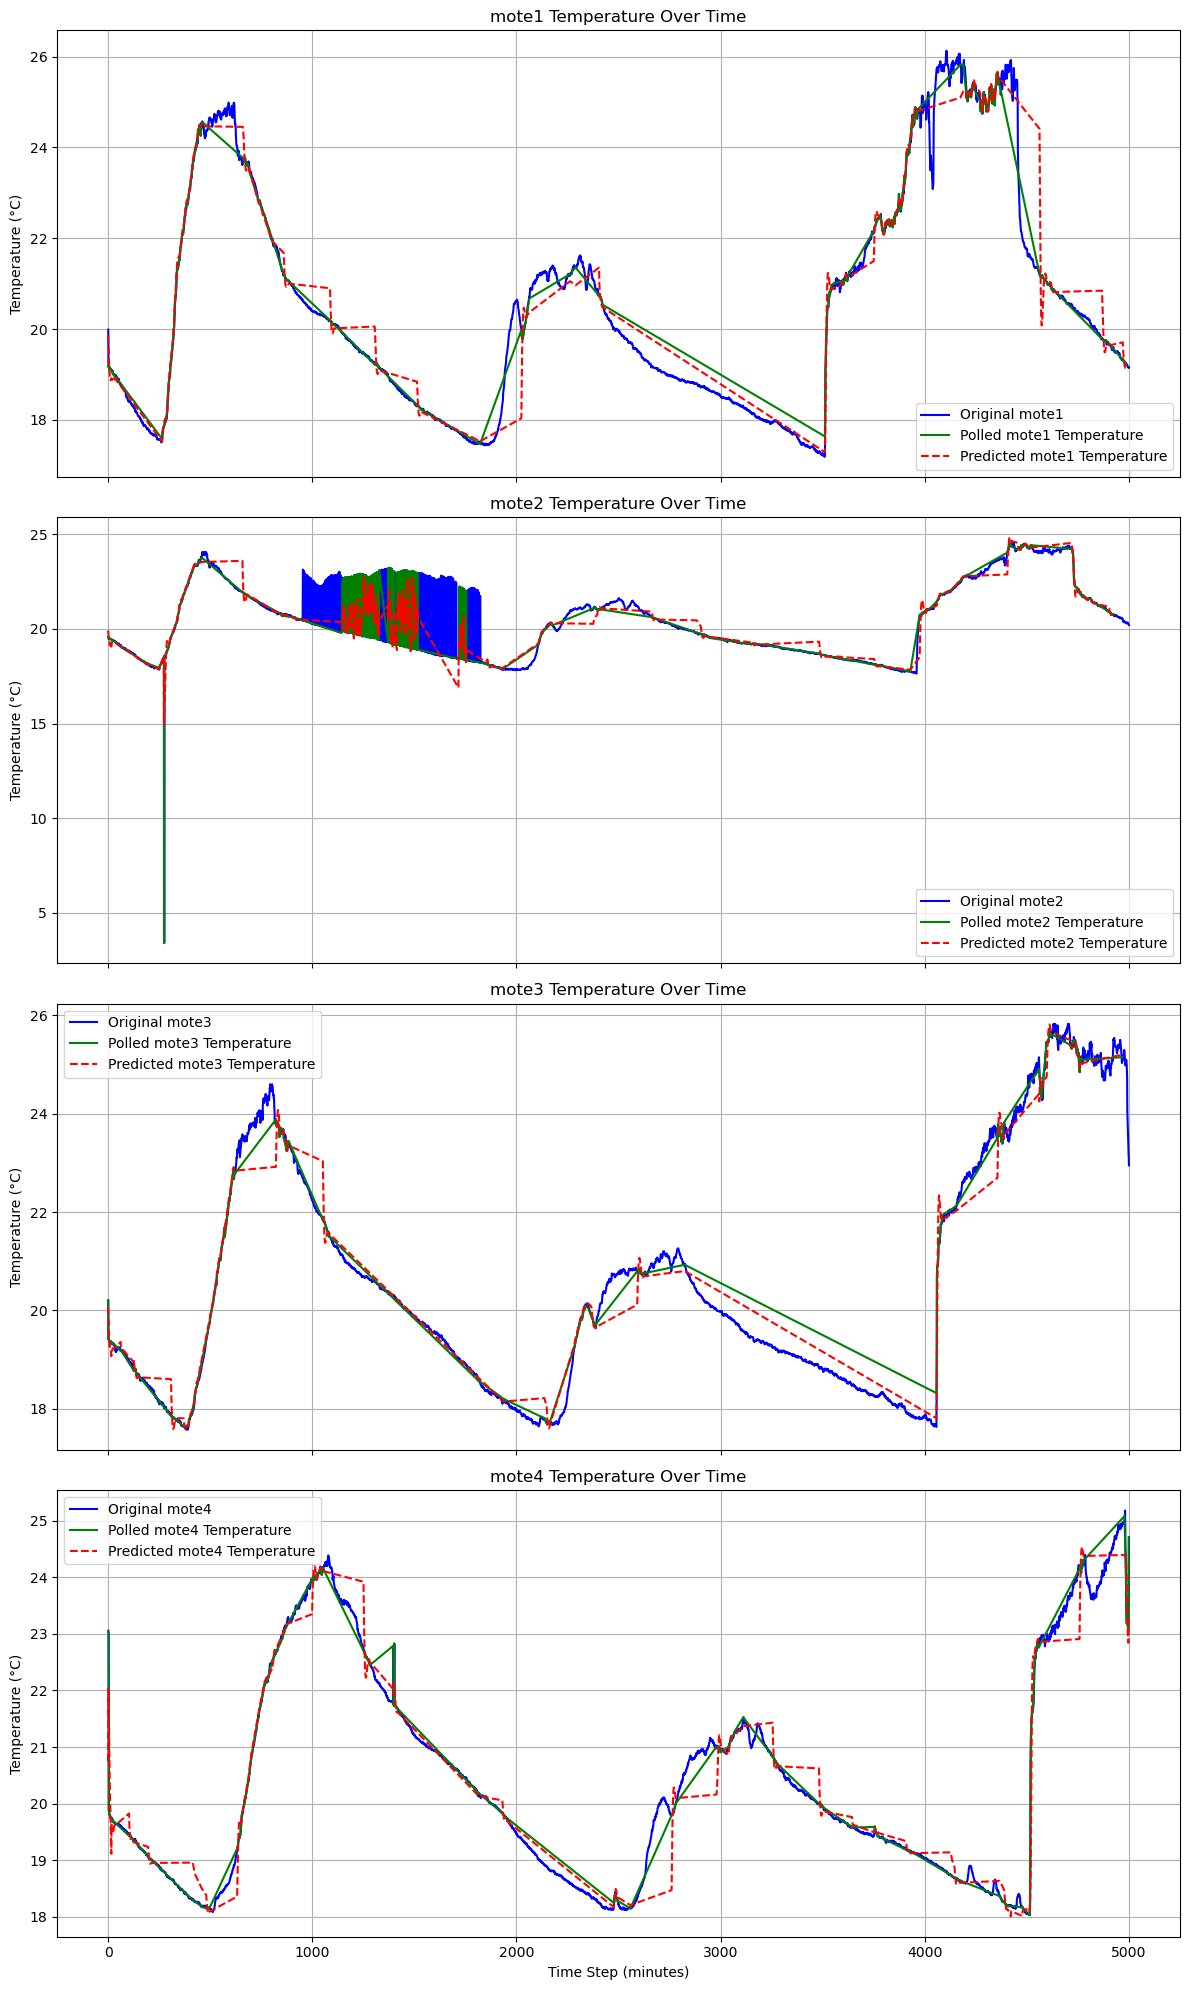

: 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming result_df contains the original data
# Assuming valuable_sensor_df contains the data from the sink end

# Plotting the temperature values for each mote in separate subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 20), sharex=True)

for i, mote in enumerate(['mote1', 'mote2', 'mote3', 'mote4']):
    # Plot original data from the node end
    axs[i].plot(result_df['SN'], result_df[mote], 'b-', label=f'Original {mote}')
    
    # Plot data collected from the sink end
    mote_data = valuable_sensor_df[valuable_sensor_df['selected_moteid'] == mote]
    axs[i].plot(mote_data['index'], mote_data['temperature'], 'g-', label=f'Polled {mote} Temperature')
    axs[i].plot(mote_data['index'], mote_data['predicted_temperature'], 'r--', label=f'Predicted {mote} Temperature')
    
    axs[i].set_ylabel('Temperature (°C)')
    axs[i].set_title(f'{mote} Temperature Over Time')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Time Step (minutes)')
plt.tight_layout()
plt.show()
